In [793]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import copy
import sys

In [876]:
im = cv2.imread("IMG_9.jpg")
RGB = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [877]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [878]:
gray

array([[ 60,  64,  86, ...,  16,  16,  16],
       [ 84,  60,  58, ...,  17,  18,  18],
       [ 59,  88,  72, ...,  17,  18,  18],
       ...,
       [110, 116,  95, ...,  30,  30,  30],
       [125, 127, 114, ...,  30,  31,  31],
       [103,  94, 109, ...,  27,  29,  31]], dtype=uint8)

In [879]:
blue = np.array([[j[2] for j in i] for i in RGB], dtype = "uint8")

In [880]:
blue

array([[ 53,  57,  81, ...,  14,  14,  14],
       [ 77,  53,  53, ...,  15,  16,  16],
       [ 52,  81,  67, ...,  15,  16,  16],
       ...,
       [106, 112,  90, ...,  28,  28,  28],
       [121, 123, 109, ...,  28,  29,  29],
       [ 99,  90, 104, ...,  25,  27,  29]], dtype=uint8)

In [881]:
all_colors = sum([gray[i] for i in range(len(gray))])

In [882]:
quant = sorted(all_colors)[len(all_colors)* 7//8]

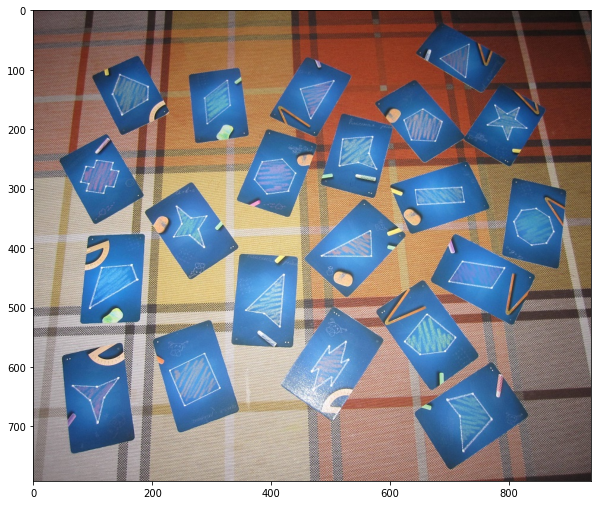

In [883]:
plt.figure(figsize=[10, 10])
plt.imshow(RGB)

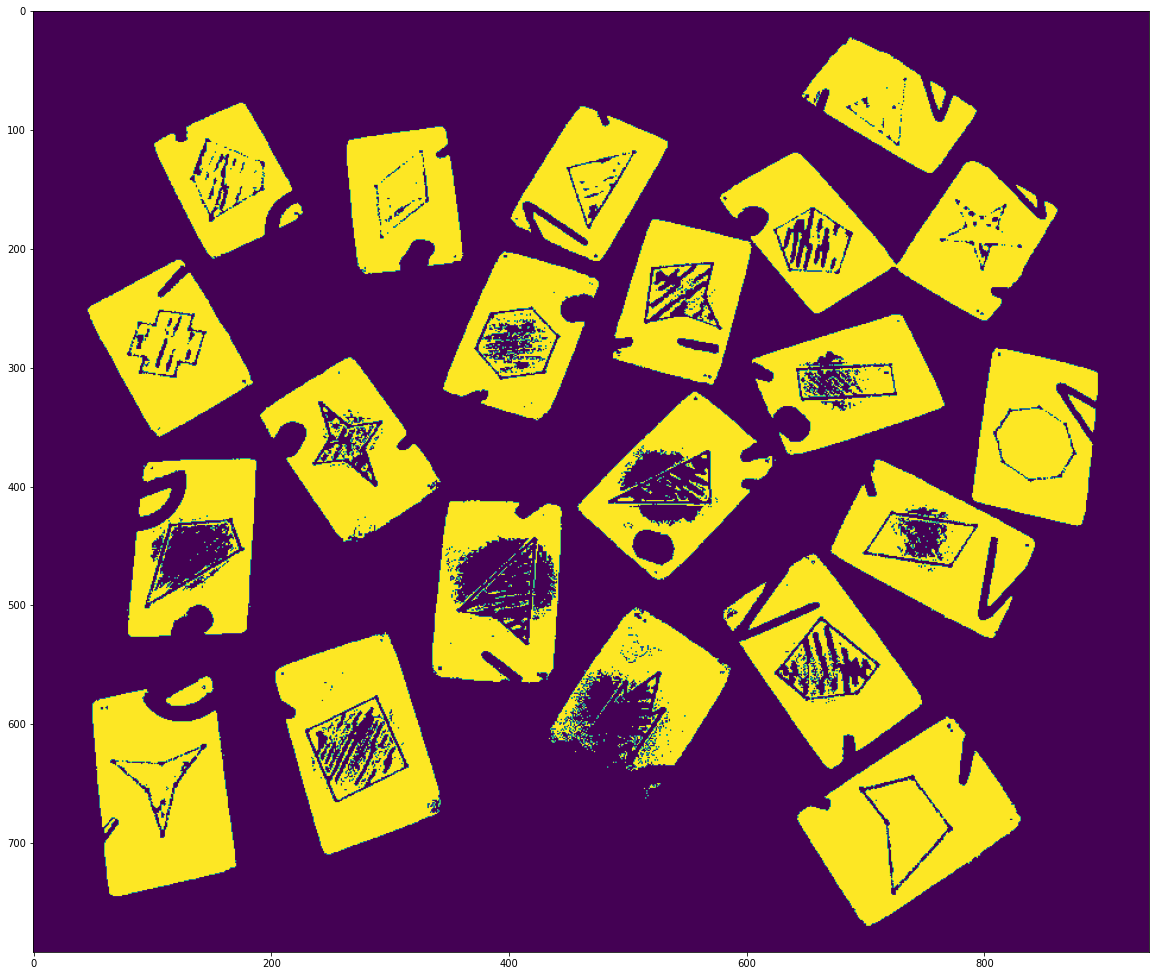

In [884]:
plt.figure(figsize=[20, 20])
RGB1 = np.array([[1 if ((j[0] < j[2]) and (j[1] < j[2])and (j[1]//2+j[0]//2<j[2]*0.7) and (j[2]<quant)) else 0 for j in i] for i in RGB], dtype='uint8')
plt.imshow(RGB1)

In [885]:
def area(im, point, points):
    if  1 <= point[0] < len(im)-1:
        if 1 <= point[1] < len(im[0])-1:
            points.append(point)
            im[point[0], point[1]] = 0
            point_id = 0
            while point_id < len(points):
                if  1 <= points[point_id][0] < len(im)-1:
                    if 1 <= points[point_id][1] < len(im[0])-1:

                        if im[points[point_id][0], points[point_id][1] + 1] == 1:
                            points.append((points[point_id][0], points[point_id][1] + 1))
                            im[points[point_id][0], points[point_id][1] + 1] = 0

                        if im[points[point_id][0], points[point_id][1] - 1] == 1:
                            points.append((points[point_id][0], points[point_id][1] - 1))
                            im[points[point_id][0], points[point_id][1] - 1] = 0

                        if im[points[point_id][0] + 1, points[point_id][1]] == 1:
                            points.append((points[point_id][0] + 1, points[point_id][1]))
                            im[points[point_id][0] + 1, points[point_id][1]] = 0

                        if im[points[point_id][0] - 1, points[point_id][1]] == 1:
                            points.append((points[point_id][0] - 1, points[point_id][1]))
                            im[points[point_id][0] - 1, points[point_id][1]] = 0
                
                point_id+=1

In [845]:
im_area = copy.deepcopy(RGB1)
pointss = []
for i in range(len(im_area)):
    for j in range(len(im_area[0])):
        if im_area[i,j] == 1:
            points = []
            area(im_area, (i,j), points)
            pointss.append(points)

In [846]:
pointss1 = copy.deepcopy(pointss)

In [847]:
i = 0
while i < len(pointss):
    if len(pointss[i]) < 4000:
        pointss.pop(i)
    else:
        i+=1

In [848]:
len(pointss)  

16

In [849]:
def x_avg_point(points, x=True):
    if x:
        return sum([i[0] for i in points])/len([i[0] for i in points])
    else:
        return sum([i[1] for i in points])/len([i[1] for i in points])

In [850]:
lin_reg_data = [(x_avg_point(i), len(i), i) for i in pointss]
lin_reg_data_x = [x_avg_point(i) for i in pointss]
lin_reg_data_y = [len(i) for i in pointss]


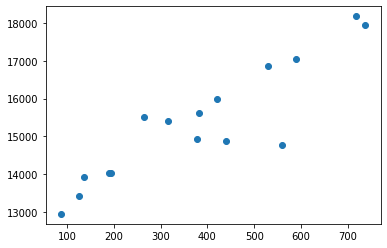

In [851]:
plt.scatter(lin_reg_data_x, lin_reg_data_y)

In [852]:
lin_reg_data = sorted(lin_reg_data)

In [853]:
lin_reg_data

[(87.31633835457706,
  12945,
  [(12, 573),
   (12, 574),
   (13, 573),
   (12, 575),
   (13, 574),
   (13, 572),
   (14, 573),
   (12, 576),
   (13, 575),
   (14, 574),
   (14, 572),
   (15, 573),
   (12, 577),
   (13, 576),
   (14, 575),
   (15, 574),
   (14, 571),
   (15, 572),
   (16, 573),
   (12, 578),
   (13, 577),
   (14, 576),
   (15, 575),
   (16, 574),
   (15, 571),
   (16, 572),
   (17, 573),
   (13, 578),
   (14, 577),
   (15, 576),
   (16, 575),
   (17, 574),
   (15, 570),
   (16, 571),
   (17, 572),
   (18, 573),
   (14, 578),
   (15, 577),
   (16, 576),
   (17, 575),
   (18, 574),
   (16, 570),
   (17, 571),
   (18, 572),
   (19, 573),
   (14, 579),
   (15, 578),
   (16, 577),
   (17, 576),
   (18, 575),
   (19, 574),
   (17, 570),
   (18, 571),
   (19, 572),
   (20, 573),
   (14, 580),
   (15, 579),
   (16, 578),
   (17, 577),
   (18, 576),
   (19, 575),
   (20, 574),
   (18, 570),
   (19, 571),
   (20, 572),
   (21, 573),
   (14, 581),
   (15, 580),
   (16, 579),
   (

In [854]:
lin_reg_data1 = copy.deepcopy(lin_reg_data)

In [855]:
for j in range(len(pointss)):
    i = 0
    while i < len(lin_reg_data)-1:
        if lin_reg_data[i][1] * 0.8 > lin_reg_data[i+1][1]:
            lin_reg_data.pop(i)
            i-=1
        i+=1

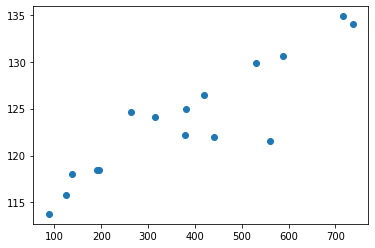

In [856]:
lin_reg_data_x = [i[0] for i in lin_reg_data]
lin_reg_data_y = [i[1]**(1/2) for i in lin_reg_data]
plt.scatter(lin_reg_data_x, lin_reg_data_y)

In [857]:
from scipy.stats import linregress

In [858]:
model = linregress(lin_reg_data_x, lin_reg_data_y)

In [859]:
model.slope

0.027287375666402863

In [860]:
model.intercept + model.slope*1

113.41212280837117

In [861]:
lin_reg_data1

[(87.31633835457706,
  12945,
  [(12, 573),
   (12, 574),
   (13, 573),
   (12, 575),
   (13, 574),
   (13, 572),
   (14, 573),
   (12, 576),
   (13, 575),
   (14, 574),
   (14, 572),
   (15, 573),
   (12, 577),
   (13, 576),
   (14, 575),
   (15, 574),
   (14, 571),
   (15, 572),
   (16, 573),
   (12, 578),
   (13, 577),
   (14, 576),
   (15, 575),
   (16, 574),
   (15, 571),
   (16, 572),
   (17, 573),
   (13, 578),
   (14, 577),
   (15, 576),
   (16, 575),
   (17, 574),
   (15, 570),
   (16, 571),
   (17, 572),
   (18, 573),
   (14, 578),
   (15, 577),
   (16, 576),
   (17, 575),
   (18, 574),
   (16, 570),
   (17, 571),
   (18, 572),
   (19, 573),
   (14, 579),
   (15, 578),
   (16, 577),
   (17, 576),
   (18, 575),
   (19, 574),
   (17, 570),
   (18, 571),
   (19, 572),
   (20, 573),
   (14, 580),
   (15, 579),
   (16, 578),
   (17, 577),
   (18, 576),
   (19, 575),
   (20, 574),
   (18, 570),
   (19, 571),
   (20, 572),
   (21, 573),
   (14, 581),
   (15, 580),
   (16, 579),
   (

In [862]:
for i in lin_reg_data1:
    print(round(i[1]/(model.intercept + model.slope*i[0])**2))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [863]:
lens = np.array([len(i) for i in pointss])

(array([2., 1., 2., 3., 2., 2., 0., 2., 0., 2.]),
 array([12945. , 13468.8, 13992.6, 14516.4, 15040.2, 15564. , 16087.8,
        16611.6, 17135.4, 17659.2, 18183. ]),
 <BarContainer object of 10 artists>)

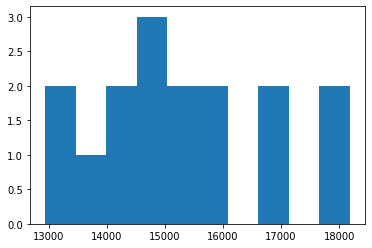

In [864]:
plt.hist(lens)

In [865]:
def dist(point1, point2):
    return ((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)**(1/2)

def dist_to_center(card_in_pixels, pixel):
    center = (len(card_in_pixels)//2, len(card_in_pixels[0])//2)
    return ((center[0]-pixel[0])**2 + (center[1]-pixel[1])**2)**(1/2)

def center(points):
    N = len(points)
    x_center = sum([point[0] for point in points])/N
    y_center = sum([point[1] for point in points])/N
    return x_center, y_center

def farthest_point(points, point):
    max_dist = 0
    my_point = point
    for some_point in points:
        if dist(some_point, point) > max_dist:
            max_dist = dist(some_point, point)
            my_point = some_point
            
    return my_point

def nearests_points(im, n_points, point, points, our_points):
    
    if  1 <= point[0] < len(im)-1:
        if 1 <= point[1] < len(im[0])-1:
            points.append(point)
            im[point[0], point[1]] = 0
            point_id = 0
            our_points.remove((point[0], point[1]))

            while point_id < len(points):
                if len(points)< n_points:
                    if  1 <= points[point_id][0] < len(im)-1:
                        if 1 <= points[point_id][1] < len(im[0])-1:

                            if im[points[point_id][0], points[point_id][1] + 1] == 1:
                                points.append((points[point_id][0], points[point_id][1] + 1))
                                im[points[point_id][0], points[point_id][1] + 1] = 0
                                our_points.remove((points[point_id][0], points[point_id][1] + 1))

                            if im[points[point_id][0], points[point_id][1] - 1] == 1:
                                points.append((points[point_id][0], points[point_id][1] - 1))
                                im[points[point_id][0], points[point_id][1] - 1] = 0
                                our_points.remove((points[point_id][0], points[point_id][1] - 1))

                            if im[points[point_id][0] + 1, points[point_id][1]] == 1:
                                points.append((points[point_id][0] + 1, points[point_id][1]))
                                im[points[point_id][0] + 1, points[point_id][1]] = 0
                                our_points.remove((points[point_id][0] + 1, points[point_id][1]))

                            if im[points[point_id][0] - 1, points[point_id][1]] == 1:
                                points.append((points[point_id][0] - 1, points[point_id][1]))
                                im[points[point_id][0] - 1, points[point_id][1]] = 0
                                our_points.remove((points[point_id][0] - 1, points[point_id][1]))
                
                point_id+=1

In [866]:
qkrq = []
new_im = copy.deepcopy(RGB1)

for i in range(len(new_im)):
    for j in range(len(new_im[0])):
        new_im[i,j]=0

for i in lin_reg_data1:
    for j in i[2]:
        new_im[j[0],j[1]]=1
        

for q in range(max([round(len(i[2])/(model.intercept + model.slope*i[0])**2) for i in lin_reg_data1])):
    for j,i in enumerate(lin_reg_data1):
        if round(len(lin_reg_data1[j][2])/(model.intercept + model.slope*lin_reg_data1[j][0])**2) > 1:
            qkrq_points = []
            nearests_points(new_im, 
                            len(lin_reg_data1[j][2])//round(len(lin_reg_data1[j][2])/(model.intercept + model.slope*lin_reg_data1[j][0])**2), 
                            farthest_point(lin_reg_data1[j][2], center(lin_reg_data1[j][2])), 
                            qkrq_points, 
                            lin_reg_data1[j][2])
            qkrq.append(qkrq_points)

In [867]:
for i in lin_reg_data1:
    print(round(len(i[2])/(model.intercept + model.slope*i[0])**2))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


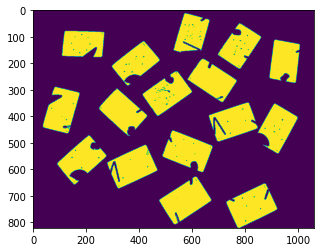

In [868]:
new_im = copy.deepcopy(RGB1)

for i in range(len(new_im)):
    for j in range(len(new_im[0])):
        new_im[i,j]=0

for i in lin_reg_data1:
    for j in i[2]:
        new_im[j[0],j[1]]=1
plt.imshow(new_im)

In [869]:
qkrq

[]

In [870]:
len(qkrq)

0

In [871]:
qkrq1 = qkrq + [i[2] for i in lin_reg_data1]

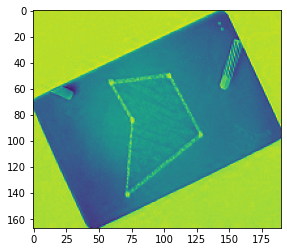

In [872]:
card = qkrq1[15]
bottom = min([i[0] for i in card])
top = max([i[0] for i in card])
left = min([i[1] for i in card])
right = max([i[1] for i in card])
card_in_pixels = np.zeros(shape = (top-bottom, right-left), dtype = "uint8")
for i in range(bottom, top):
    for j in range(left, right):
        card_in_pixels[i-bottom, j-left] = blue[i,j]
    
plt.imshow(card_in_pixels)

In [873]:
# all_colors_in_card = sum([i for i in card_in_pixels])
# col = sorted(all_colors_in_card)[len(all_colors_in_card)//2]
# for i in range(len(card_in_pixels)):
#     for j in range(len(card_in_pixels[0])):
#         dist = dist_to_center(card_in_pixels, (i,j))
#         card_in_pixels[i,j] = col * dist**2/(dist**2+1000) + card_in_pixels[i,j]*1000/(dist**2+1000)
# #         if dist > 100:
# #             card_in_pixels[i,j] = col
# plt.imshow(card_in_pixels)

True
True
True
True
True
5
True
True
True
True
True
True
True
True
8
True
False
False
False
False
False
False
False
8
True
True
True
True
4
True
False
False
False
False
False
False
False
False
False
10
True
True
True
True
True
True
True
True
8
True
True
True
True
True
5
True
True
True
3
True
True
True
True
True
True
True
True
8
True
True
True
True
4
True
False
False
False
False
False
6
True
True
True
True
True
True
6
True
True
True
True
4
True
True
True
3
True
True
True
True
True
True
True
True
8
True
True
False
False
False
5


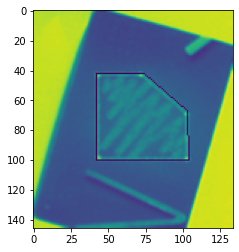

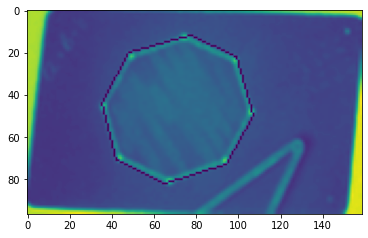

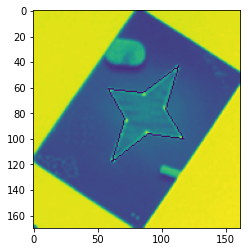

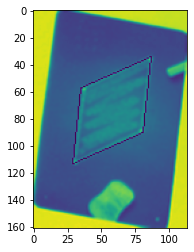

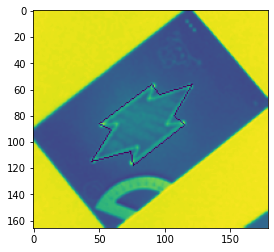

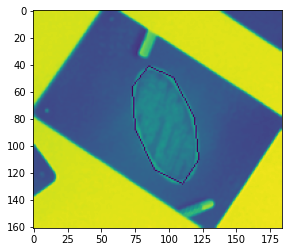

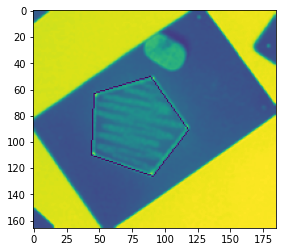

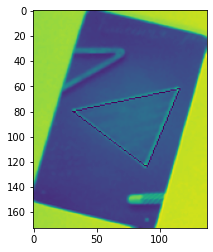

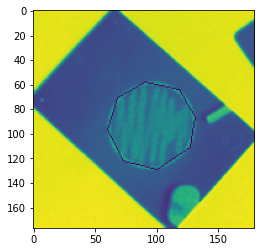

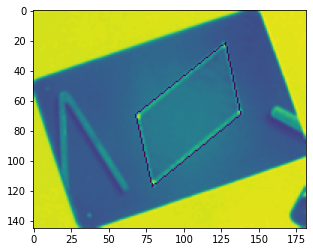

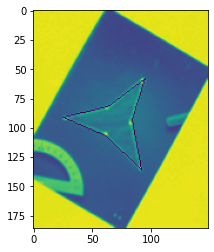

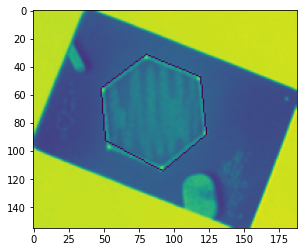

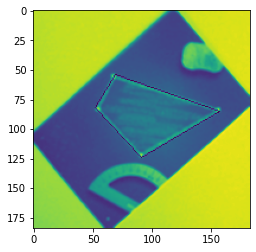

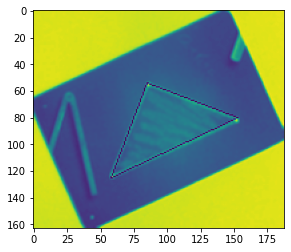

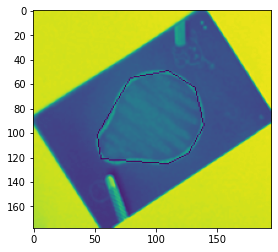

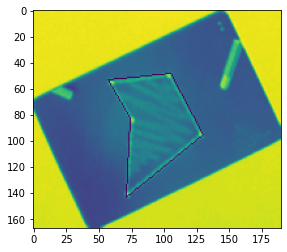

In [874]:
l = 0
for i in range(len(qkrq1)):
    if len(qkrq1[i])>1:
        
        card = qkrq1[i]
        bottom = min([i[0] for i in card])
        top = max([i[0] for i in card])
        left = min([i[1] for i in card])
        right = max([i[1] for i in card])
        card_in_pixels = np.zeros(shape = (top-bottom + 2*l, right-left + 2*l), dtype = "uint8")
        for i in range(bottom-l, top+l):
            for j in range(left-l, right+l):
                card_in_pixels[i-bottom, j-left] = gray[i,j]


        card_in_pixels = cv2.GaussianBlur(card_in_pixels, (3,3), 0)
        edges = cv2.Canny(card_in_pixels, 10, 100)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
        cnt = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnt = imutils.grab_contours(cnt)

        min_dist = None
        cont = []

        for c in cnt:
            p = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02* p, True)
            mean_x = sum([i[0][1]for i in approx])/len([i[0][1]for i in approx])
            mean_y = sum([i[0][0]for i in approx])/len([i[0][0]for i in approx])
            
            
            our_dist = dist_to_center(card_in_pixels, (mean_x,mean_y))
            if min_dist is not None:
                if our_dist < min_dist:
                    min_dist = our_dist
                    cont = approx
            else:
                min_dist = our_dist
                cont = approx
        #     cv2.drawContours(card_in_pixels, [approx], -1, (0, 255, 0), 1)
        flag = True
        for j in range(len(cont)):
            cont1_x = []
            cont1_y = []
            for q, i in enumerate(cont):
                if q != j:
                    cont1_x.append(i[0][0])
                    cont1_y.append(i[0][1])
            flag = flag and inPolygon(cont[j][0][0], cont[j][0][1], cont1_x, cont1_y)
            print(flag)
        cv2.putText(RGB, f"P{len(cont)}" + flag*"C", ((left*2+right)//3,(bottom*2+top)//3), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)
        print(len(cont))
        cv2.drawContours(card_in_pixels, [cont], -1, (0, 255, 0), 1)
        plt.figure()
        plt.imshow(card_in_pixels)

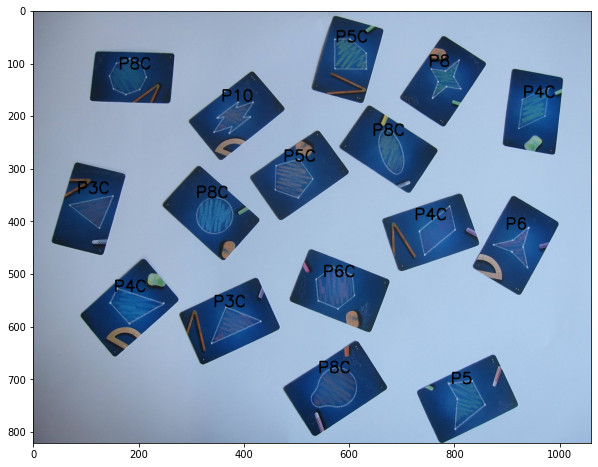

In [875]:
plt.figure(figsize=[10, 10])
plt.imshow(RGB)

In [776]:
cont

array([[[140,  79]],

       [[ 83,  39]],

       [[ 43, 102]]], dtype=int32)

In [777]:
flag = True
for j in range(len(cont)):
    cont1_x = []
    cont1_y = []
    for q, i in enumerate(cont):
        if q != j:
            cont1_x.append(i[0][0])
            cont1_y.append(i[0][1])
    flag = flag and inPolygon(cont[j][0][0], cont[j][0][0], cont1_x, cont1_y)

In [764]:
cont1

[array([140,  79], dtype=int32),
 array([83, 39], dtype=int32),
 array([45, 94], dtype=int32),
 array([ 43, 102], dtype=int32)]

In [785]:
def inPolygon(x, y, xp, yp):
    c=0
    for i in range(len(xp)):
        if (((yp[i]<=y and y<yp[i-1]) or (yp[i-1]<=y and y<yp[i])) and (x > (xp[i-1] - xp[i]) * (y - yp[i]) / (yp[i-1] - yp[i]) + xp[i])):
            c = 1 - c
    if c == 0:
        return True
    else:
        return False
# a,b,c = map(int,input().split())
# x = []
# y = []
# for i in range(a):
#     x1,y1=map(int,input().split())
#     x.append(x1)
#     y.append(y1)
# print(inPolygon(b, c, x, y))